In [36]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

from tools.DataLoader import DataLoader
from tools.ModelTester import ModelTester
from models import LinearModels
from tools.Metrics import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
dl = DataLoader("data/train.csv", class_col_name="species", excluded_features={"id"})
dl.load()
dataset = dl.get_dataset()

print(f"Number of data entries : {len(dataset)}")
print(f"Number of classes : {len(dataset.group_by_class())}")

grouppedClasses = pd.DataFrame(
    data=np.array([ len(ds) for ds in dataset.group_by_class() ]),
    columns=["Count"],
    index=[f"{dl.get_label_name(ds.labels[0])}" for ds in dataset.group_by_class()]
)
display(grouppedClasses)

# Stratisfied split !
train_set, test_set = dataset.split_by_class([0.8])
print(f"Train set : {len(train_set)} - Number of classes : {len(train_set.group_by_class())}")
print(f"Train set : {len(test_set)} - Number of classes : {len(test_set.group_by_class())}")

Number of data entries : 990
Number of classes : 99


,Count
Acer_Opalus,10
Pterocarya_Stenoptera,10
Quercus_Hartwissiana,10
Tilia_Tomentosa,10
Quercus_Variabilis,10
...,...
Ulmus_Bergmanniana,10
Quercus_Nigra,10
Salix_Intergra,10
Quercus_Infectoria_sub,10


Train set : 792 - Number of classes : 99
Train set : 198 - Number of classes : 99


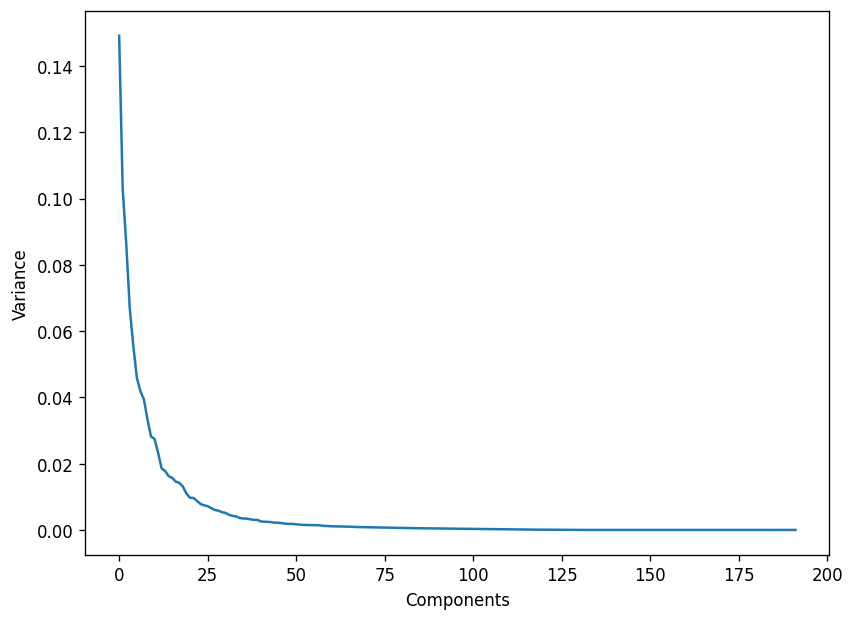

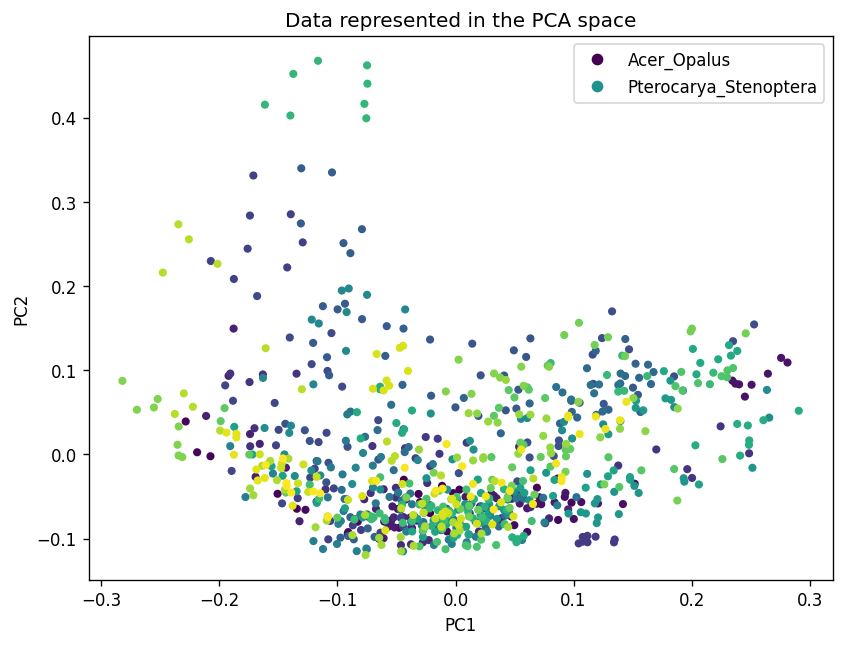

In [38]:
from sklearn.decomposition import PCA

# Project into the PCA space (2 major axis)
pca = PCA()
pcaSpace = pca.fit_transform(train_set.features)
pcaSpaceXY = (pcaSpace[:,0], pcaSpace[:,1])

# Plot PCA axis contributions
plt.figure(figsize=(8, 6), dpi=120)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel("Variance")
plt.xlabel("Components")
plt.show()

# Plot data in the PCA space (2 major axis)
plt.figure(figsize=(8, 6), dpi=120)
plt.xlabel("PC1")
plt.ylabel("PC2")
scatter = plt.scatter(x=pcaSpaceXY[0], y=pcaSpaceXY[1], c=train_set.labels, s=15)
plt.legend(handles=scatter.legend_elements(num=3)[0], labels=dl.classes)
plt.title("Data represented in the PCA space", loc='center', wrap=True)
plt.show()

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


,"LinearRegression (Norm=False,PCA=False)","LinearRegression (Norm=True,PCA=False)","LinearRegression (Norm=True,PCA=True)"
Log loss,4.149428,0.025308,0.025308
Accuracy,0.671717,1.000000,1.000000
Precision,0.671717,1.000000,1.000000
Sensitivity,0.671717,1.000000,1.000000
Specificity,0.996650,1.000000,1.000000
Fallout,0.003350,0.000000,0.000000
F1 Score,0.540893,1.000000,1.000000


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,"LinearRegression (Norm=False,PCA=False)","LinearRegression (Norm=True,PCA=False)","LinearRegression (Norm=True,PCA=True)"
Log loss,4.176113,0.110532,0.110536
Accuracy,0.590909,0.989899,0.989899
Precision,0.590909,0.989899,0.989899
Sensitivity,0.590909,0.989899,0.989899
Specificity,0.995826,0.999897,0.999897
Fallout,0.004174,0.000103,0.000103
F1 Score,0.440116,0.984925,0.984925


~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


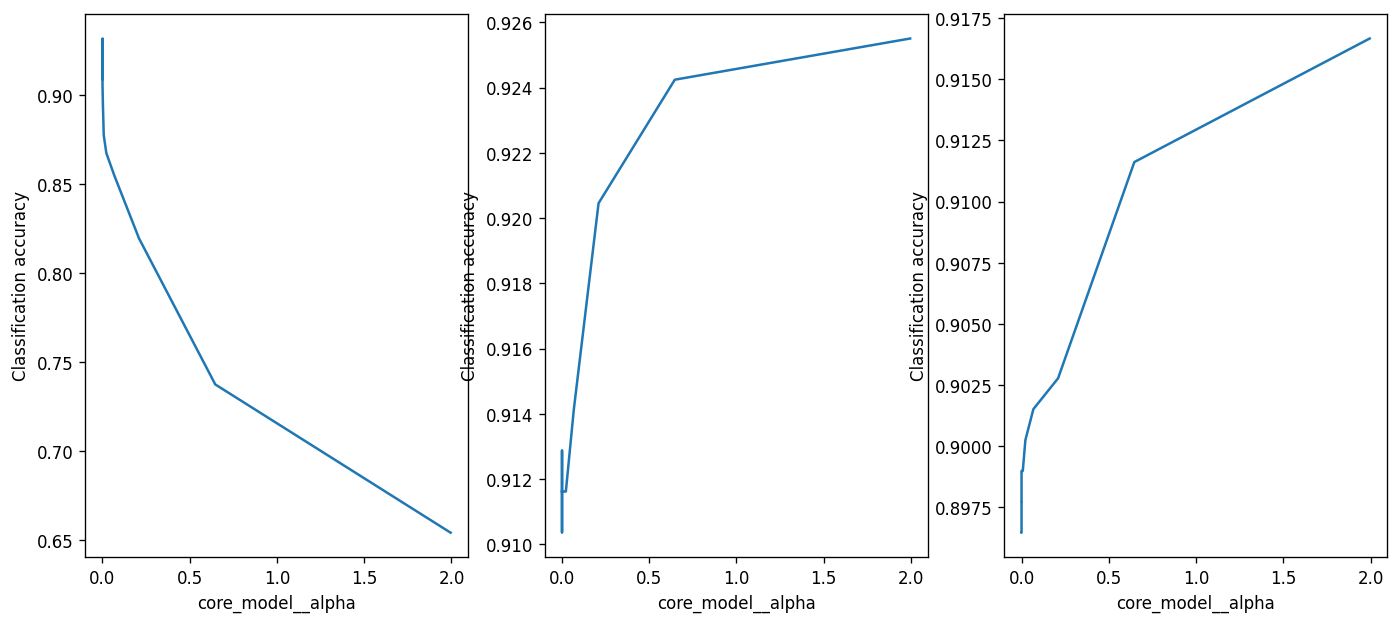

,"RidgeRegression (Norm=False,PCA=False)","RidgeRegression (Norm=True,PCA=False)","RidgeRegression (Norm=True,PCA=True)"
Log loss,Not Applicable,Not Applicable,Not Applicable
Accuracy,0.9949494949494949,0.9987373737373737,0.9987373737373737
Precision,0.9949494949494949,0.9987373737373737,0.9987373737373737
Sensitivity,0.9949494949494949,0.9987373737373737,0.9987373737373737
Specificity,0.9999484642341785,0.9999871160585446,0.9999871160585446
Fallout,5.1535765821480104e-05,1.2883941455370026e-05,1.2883941455370026e-05
F1 Score,0.9924562737086956,0.9981128932899349,0.9981128932899349


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,"RidgeRegression (Norm=False,PCA=False)","RidgeRegression (Norm=True,PCA=False)","RidgeRegression (Norm=True,PCA=True)"
Log loss,Not Applicable,Not Applicable,Not Applicable
Accuracy,0.9141414141414141,0.9141414141414141,0.9141414141414141
Precision,0.9141414141414141,0.9141414141414141,0.9141414141414141
Sensitivity,0.9141414141414141,0.9141414141414141,0.9141414141414141
Specificity,0.9991238919810348,0.9991238919810348,0.9991238919810348
Fallout,0.0008761080189651618,0.0008761080189651618,0.0008761080189651618
F1 Score,0.8735375301839949,0.8735375301839949,0.8735375301839949


~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


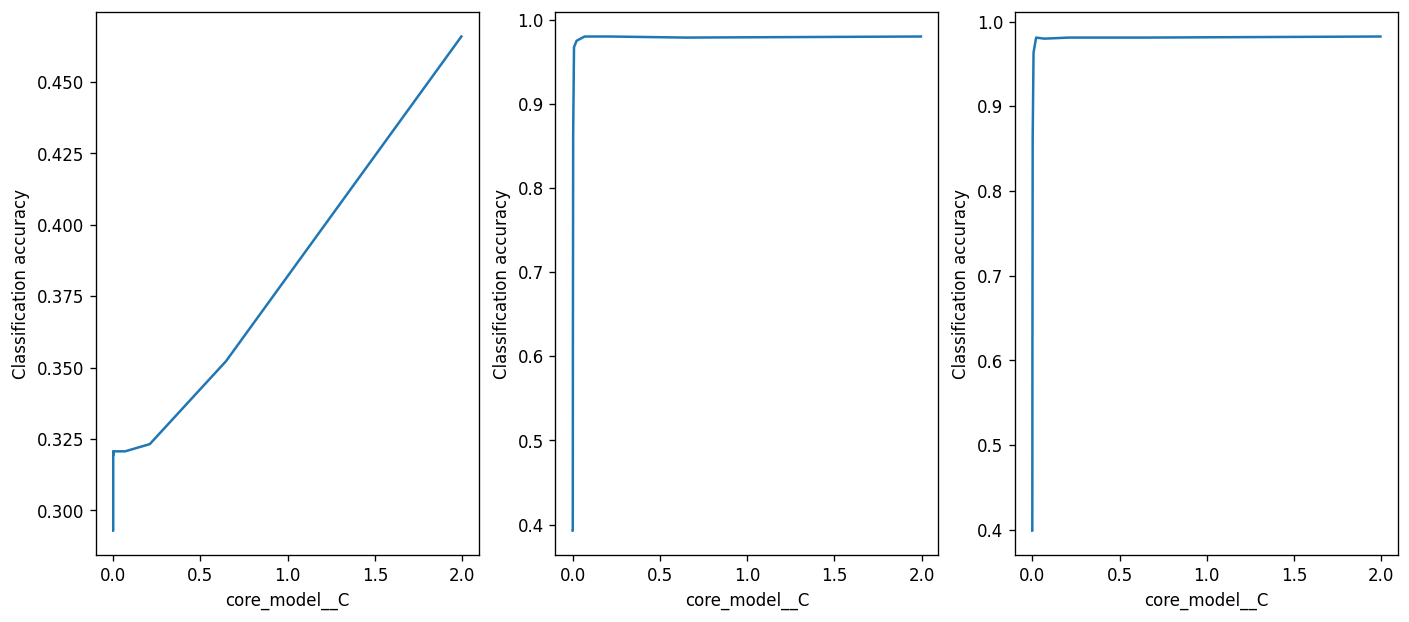

,"LogisticClassifier (Norm=False,PCA=False)","LogisticClassifier (Norm=True,PCA=False)","LogisticClassifier (Norm=True,PCA=True)"
Log loss,3.780274,0.236495,0.014108
Accuracy,0.715909,1.000000,1.000000
Precision,0.715909,1.000000,1.000000
Sensitivity,0.715909,1.000000,1.000000
Specificity,0.997101,1.000000,1.000000
Fallout,0.002899,0.000000,0.000000
F1 Score,0.598392,1.000000,1.000000


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,"LogisticClassifier (Norm=False,PCA=False)","LogisticClassifier (Norm=True,PCA=False)","LogisticClassifier (Norm=True,PCA=True)"
Log loss,3.830817,0.409610,0.085608
Accuracy,0.646465,0.994949,0.989899
Precision,0.646465,0.994949,0.989899
Sensitivity,0.646465,0.994949,0.989899
Specificity,0.996392,0.999948,0.999897
Fallout,0.003608,0.000052,0.000103
F1 Score,0.508768,0.992456,0.984925


~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


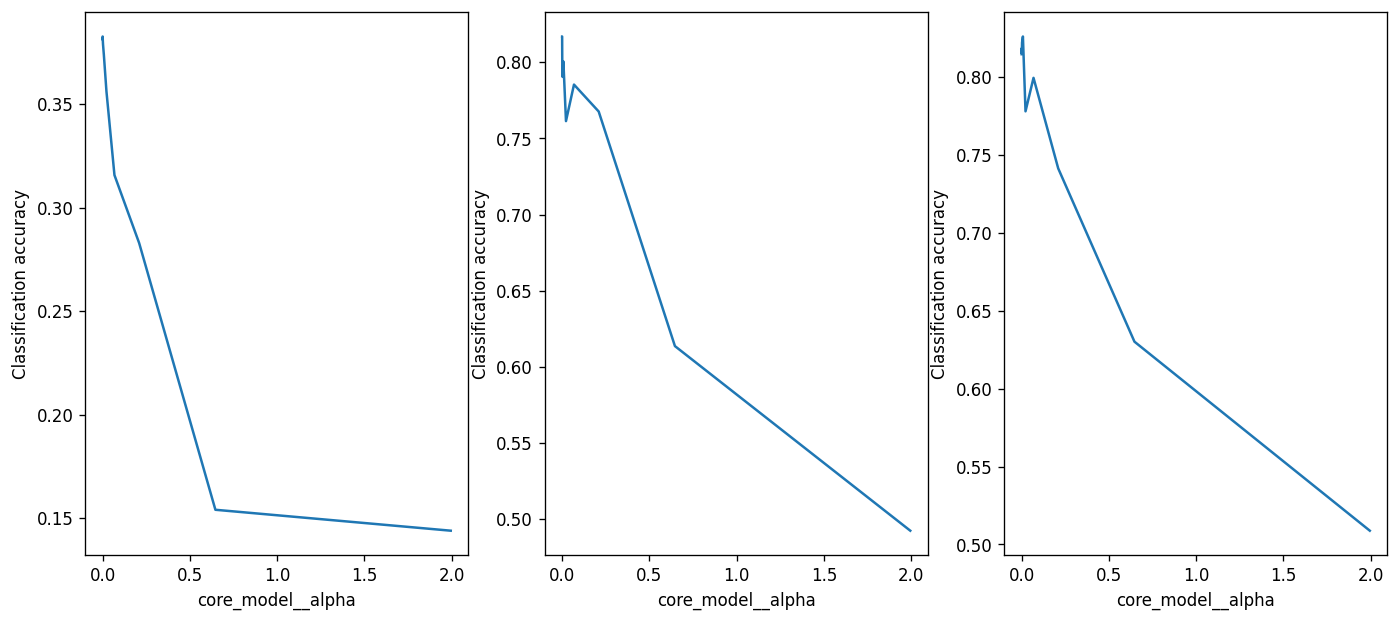

,"SinglePerceptron (Norm=False,PCA=False)","SinglePerceptron (Norm=True,PCA=False)","SinglePerceptron (Norm=True,PCA=True)"
Log loss,Not Applicable,Not Applicable,Not Applicable
Accuracy,0.4078282828282828,0.9646464646464646,0.9621212121212122
Precision,0.4078282828282828,0.9646464646464646,0.9621212121212122
Sensitivity,0.4078282828282828,0.9646464646464646,0.9621212121212122
Specificity,0.9939574314574314,0.9996392496392497,0.9996134817563389
Fallout,0.006042568542568543,0.00036075036075036075,0.0003865182436611008
F1 Score,0.2373029009778672,0.9474617617868306,0.9437333495732835


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,"SinglePerceptron (Norm=False,PCA=False)","SinglePerceptron (Norm=True,PCA=False)","SinglePerceptron (Norm=True,PCA=True)"
Log loss,Not Applicable,Not Applicable,Not Applicable
Accuracy,0.30808080808080807,0.7929292929292929,0.797979797979798
Precision,0.30808080808080807,0.7929292929292929,0.797979797979798
Sensitivity,0.30808080808080807,0.7929292929292929,0.797979797979798
Specificity,0.9929396000824572,0.9978870336013194,0.9979385693671408
Fallout,0.007060399917542775,0.0021129663986806844,0.0020614306328592042
F1 Score,0.14590668019069683,0.7021790613260871,0.7091321850275019


~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


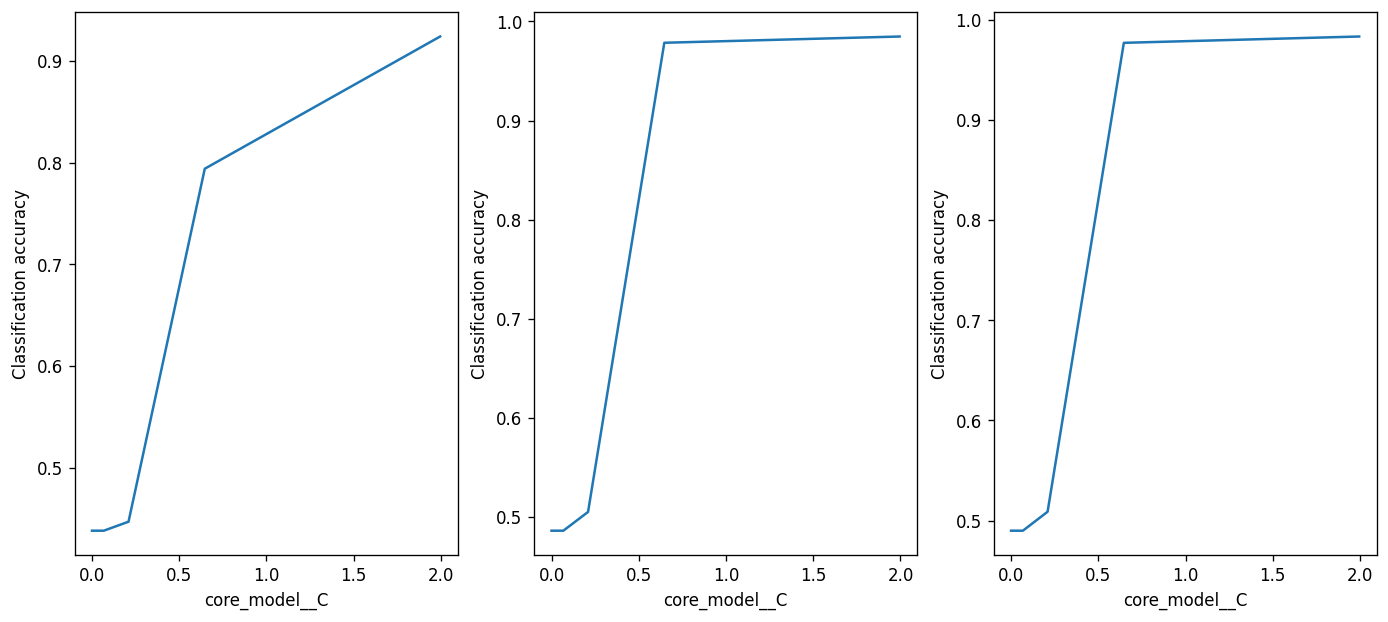

,"SupportVectorMachine (Norm=False,PCA=False)","SupportVectorMachine (Norm=True,PCA=False)","SupportVectorMachine (Norm=True,PCA=True)"
Log loss,2.105896,2.1785,2.178771
Accuracy,1.000000,1.0000,1.000000
Precision,1.000000,1.0000,1.000000
Sensitivity,1.000000,1.0000,1.000000
Specificity,1.000000,1.0000,1.000000
Fallout,0.000000,0.0000,0.000000
F1 Score,1.000000,1.0000,1.000000


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,"SupportVectorMachine (Norm=False,PCA=False)","SupportVectorMachine (Norm=True,PCA=False)","SupportVectorMachine (Norm=True,PCA=True)"
Log loss,2.383612,2.437383,2.438068
Accuracy,0.914141,0.984848,0.984848
Precision,0.914141,0.984848,0.984848
Sensitivity,0.914141,0.984848,0.984848
Specificity,0.999124,0.999845,0.999845
Fallout,0.000876,0.000155,0.000155
F1 Score,0.873538,0.977407,0.977407


In [39]:
# Linear Regression : 
mt = ModelTester("LinearRegression")
mt.test(train_set, test_set)

# Ridge Regression : 
mt = ModelTester("RidgeRegression", core_model__alpha=np.logspace(-9, 0.3, num=20))
mt.test(train_set, test_set)

# Logistic Regression :
mt = ModelTester("LogisticClassifier", core_model__C=np.logspace(-9, 0.3, num=20))
mt.test(train_set, test_set)

# Perceptron : 
mt = ModelTester("SinglePerceptron", core_model__alpha=np.logspace(-9, 0.3, num=20))
mt.test(train_set, test_set)

# SVM : 
mt = ModelTester("SupportVectorMachine", core_model__C=np.logspace(-9, 0.3, num=20))
mt.test(train_set, test_set)